In [1]:
#Import Libraries
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
import string
import plotly.express as px
import re
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('stopwords')
nltk.download('vader_lexicon')

#!pip install unidecode
import unidecode

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Merlin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/Merlin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
def dfCleaning(df):
    
    from nltk.stem import WordNetLemmatizer 
    nltk.download('wordnet')
    from nltk.stem import PorterStemmer
    nltk.download('punkt')
    from nltk.tokenize import word_tokenize 
    import matplotlib.animation as animation
    import operator
    from collections import Counter
    
    #import pandas_profiling

    #df = df[['text','retweet_count','favorite_count']]
    df.drop_duplicates(inplace = True)
    #Code to remove https
    df['clean_tweet'] = df['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
    #Code to remove @
    df['clean_tweet'] = df['clean_tweet'].apply(
        lambda x : ' '.join([tweet for tweet in x.split()if not tweet.startswith("@")]))
    #Removing numbers
    df['clean_tweet'] = df['clean_tweet'].apply(
        lambda x : ' '.join([tweet for tweet in x.split() if not tweet == '\d*']))
    #Removing all the greek characters using unidecode library
    df['clean_tweet'] = df['clean_tweet'].apply(
        lambda x : ' '.join([unidecode.unidecode(word) for word in x.split()])) 
    #Removing the word 'hmm' and it's variants
    df['clean_tweet'] = df['clean_tweet'].apply(
        lambda x : ' '.join([word for word in x.split() if not word == 'h(m)+' ]))
    #Code for removing slang words
    d = {'luv':'love','wud':'would','lyk':'like','wateva':'whatever','ttyl':'talk to you later',
                   'kul':'cool','fyn':'fine','omg':'oh my god!','fam':'family','bruh':'brother',
                   'cud':'could','fud':'food'} ## Need a huge dictionary
    words = "I luv myself"
    words = words.split()
    reformed = [d[word] if word in d else word for word in words]
    reformed = " ".join(reformed)
    
    df['clean_tweet'] = df['clean_tweet'].apply(
        lambda x : ' '.join(d[word] if word in d else word for word in x.split()))
    #Finding words with # attached to it
    df['#'] = df['clean_tweet'].apply(
        lambda x : ' '.join([word for word in x.split() if word.startswith('#')]))
    frame = df['#']
    frame = pd.DataFrame(frame)
    frame = frame.rename({'#':'Count(#)'},axis = 'columns')
    frame[frame['Count(#)'] == ''] = 'No hashtags'
    data_frame = pd.concat([df,frame],axis = 1)
    data_frame.drop('#',axis = 1,inplace = True)
    
    #Column showing whether the corresponding tweet has a hash tagged word or not
    data_frame = data_frame.rename({'Count(#)':'Hash words'},axis = 'columns')
    
    #Removing stopwords
    data_frame['clean_tweet'] = data_frame['clean_tweet'].apply(
        lambda x : ' '.join([word for word in x.split() if not word in set(stopwords.words('english'))]))
    #Lemmitization
    lemmatizer = WordNetLemmatizer()
    data_frame['clean_tweet'] = data_frame['clean_tweet'].apply(lambda x : ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
    
    #Stemming
    ps = PorterStemmer()
    adwait = data_frame
    #adwait.head()
    data_frame['clean_tweet'] = data_frame['clean_tweet'].apply(lambda x : ' '.join([ps.stem(word) for word in x.split()]))
    #reset index
    data_frame.reset_index(drop=True, inplace=True)
        
    return data_frame

In [4]:
#Load EU data
data_path = "Data/EU2022Final.csv"
EU_df = pd.read_csv(data_path)
EU_df.shape

(3303, 151)

In [5]:
#Load NA data
data_path = "Data/NA2022Final.csv"
NA_df = pd.read_csv(data_path)
NA_df.shape

(1204, 149)

In [6]:
#Load Asia data
data_path = "Data/Asia2022Final.csv"
AS_df = pd.read_csv(data_path)
AS_df.shape

(218, 153)

In [7]:
#Load India Data
data_path = "Data/Ind2022Final.csv"
Ind_df = pd.read_csv(data_path)
Ind_df.shape

(519, 153)

### Europe Data

In [8]:
EU_df.info()
EU_df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3303 entries, 0 to 3302
Columns: 151 entries, _id to user.withheld_in_countries
dtypes: bool(18), float64(35), int64(11), object(87)
memory usage: 3.4+ MB


,_id,contributors,coordinates,created_at,entities.hashtags,entities.media,entities.symbols,entities.urls,entities.user_mentions,extended_entities.media,...,user.profile_use_background_image,user.protected,user.screen_name,user.statuses_count,user.time_zone,user.translator_type,user.url,user.utc_offset,user.verified,user.withheld_in_countries
0,61edc79d9130aa71fc8397a7,NaN,NaN,Sun Jan 23 21:23:07 +0000 2022,[],NaN,[],"[{""url"":""https://t.co/QosYCVUKkL"",""expanded_ur...",[],NaN,...,True,False,SarahSurviving,303,NaN,none,NaN,NaN,False,[]
1,61edc79d9130aa71fc8397a8,NaN,NaN,Sun Jan 23 21:20:00 +0000 2022,[],NaN,[],"[{""url"":""https://t.co/TFwAllXenO"",""expanded_ur...",[],NaN,...,True,False,AkeelaAhmed,59134,NaN,none,https://t.co/gzvq6wbmVP,NaN,False,[]


In [9]:
EU_tweets = EU_df[['text','retweet_count','favorite_count']]

In [10]:
#Data cleaning
EU_Cleaned = dfCleaning(EU_tweets)

[nltk_data] Downloading package wordnet to /Users/Merlin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Merlin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
EU_Cleaned.head(2)

,text,retweet_count,favorite_count,clean_tweet,Hash words
0,A women’s support group chooses not to signpos...,2,3,a women' support group choos signpost vulner r...,No hashtags
1,You know the worst thing about the hate incide...,0,1,you know worst thing hate incid i experienc la...,No hashtags


### North America Data

In [12]:
NA_tweets = NA_df[['text','retweet_count','favorite_count']]

In [13]:
NA_Cleaned = dfCleaning(NA_tweets)

[nltk_data] Downloading package wordnet to /Users/Merlin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Merlin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
NA_Cleaned.head(2)

,text,retweet_count,favorite_count,clean_tweet,Hash words
0,@TheRevAl @TheRevAl @MeetThePress @FaceTheNati...,1,1,"one ""white black americans"" v...",No hashtags
1,@nathaliejacoby1 the legal punishment will not...,0,7,legal punish strong enough. i'm sure crimin ch...,No hashtags


### Asia Data

In [15]:
AS_tweets = AS_df[['text','retweet_count','favorite_count']]

In [16]:
AS_Cleaned = dfCleaning(AS_tweets)

[nltk_data] Downloading package wordnet to /Users/Merlin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Merlin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
AS_Cleaned.head(2)

,text,retweet_count,favorite_count,clean_tweet,Hash words
0,District attorney of Connecticut: James be cha...,0,0,district attorney connecticut: jame charg hate...,No hashtags
1,@hongerootooties this is a hate crime cc: @ril...,0,0,hate crime cc:,No hashtags


### India Data

In [18]:
Ind_tweets = Ind_df[['text','retweet_count','favorite_count']]

In [19]:
Ind_Cleaned = dfCleaning(Ind_tweets)

[nltk_data] Downloading package wordnet to /Users/Merlin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Merlin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
Ind_Cleaned.head(2)

,text,retweet_count,favorite_count,clean_tweet,Hash words
0,@Hate_Congress @AminaaKausar Death sentence fo...,0,0,death sentenc heinou crime. religion matter . ...,No hashtags
1,@Hate_Congress @AminaaKausar Crime is crime . ...,0,0,crime crime . chayee mere log karee ye apkeee ...,No hashtags


## EDA

*Retweet Count*

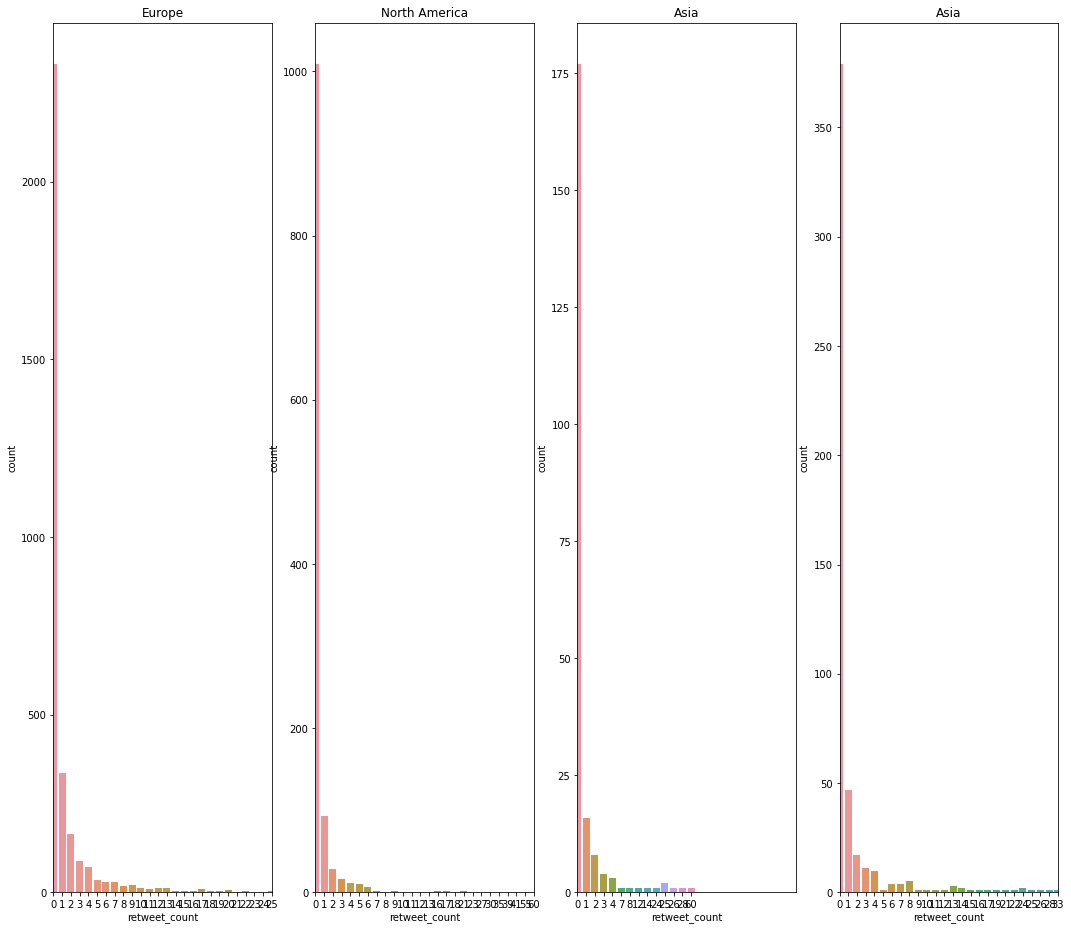

In [21]:
#retweet_count plots
fig, axs = plt.subplots(1,4, figsize=(18,16))

ax1=sns.countplot(x='retweet_count', data=EU_Cleaned, ax=axs[0])
ax1.set(title='Europe')
ax1.set_xlim([0, 25])

ax2=sns.countplot(x='retweet_count', data=NA_Cleaned, ax=axs[1])
ax2.set(title='North America')
ax2.set_xlim([0, 25])

ax3=sns.countplot(x='retweet_count', data=AS_Cleaned, ax=axs[2])
ax3.set(title='Asia')
ax3.set_xlim([0, 25])

ax4=sns.countplot(x='retweet_count', data=Ind_Cleaned, ax=axs[3])
ax4.set(title='Asia')
ax4.set_xlim([0, 25])

plt.show()

*Favorite Count*

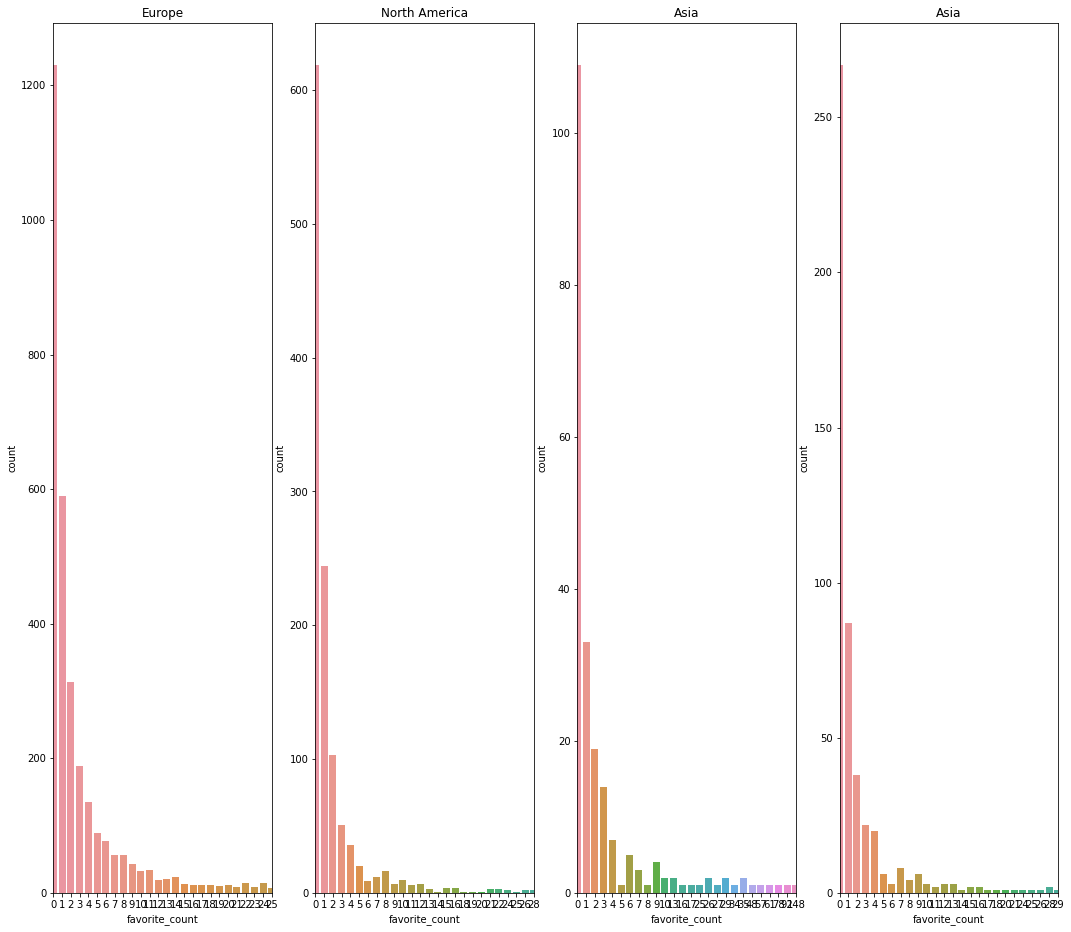

In [22]:
#favorite_count plots
fig, axs = plt.subplots(1,4, figsize=(18,16))

ax1=sns.countplot(x='favorite_count', data=EU_Cleaned, ax=axs[0])
ax1.set(title='Europe')
ax1.set_xlim([0, 25])

ax2=sns.countplot(x='favorite_count', data=NA_Cleaned, ax=axs[1])
ax2.set(title='North America')
ax2.set_xlim([0, 25])

ax3=sns.countplot(x='favorite_count', data=AS_Cleaned, ax=axs[2])
ax3.set(title='Asia')
ax3.set_xlim([0, 25])

ax4=sns.countplot(x='favorite_count', data=Ind_Cleaned, ax=axs[3])
ax4.set(title='Asia')
ax4.set_xlim([0, 25])

plt.show()

**Wordclouds**

In [23]:
def my_tf_color_func(dictionary):
  def my_tf_color_func_inner(word, **kwargs):
    return "hsl(%d, 80%%, 50%%)" % (360 * dictionary[word])
  return my_tf_color_func_inner

*EU*

Normal words


(-0.5, 799.5, 499.5, -0.5)

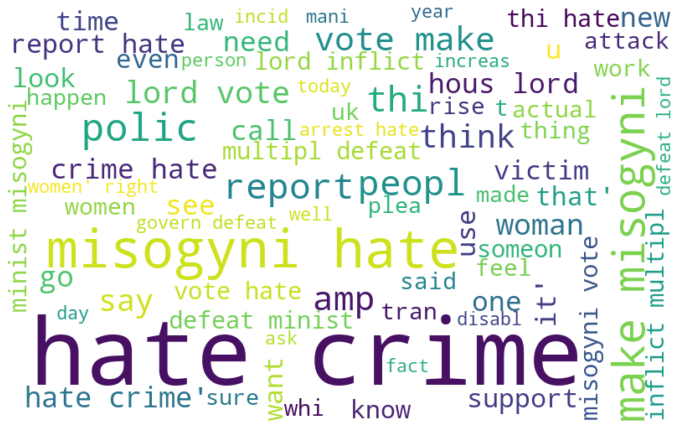

In [24]:
normal_words = ' '.join([word for word in EU_Cleaned['clean_tweet']])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 75,background_color = "white").generate(normal_words)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

*NA*

Normal words


(-0.5, 799.5, 499.5, -0.5)

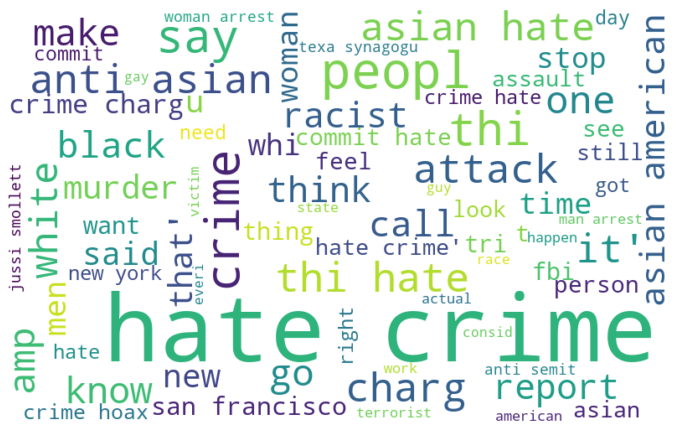

In [25]:
normal_words = ' '.join([word for word in NA_Cleaned['clean_tweet']])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 75,background_color = "white").generate(normal_words)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

*AS*

Normal words


(-0.5, 799.5, 499.5, -0.5)

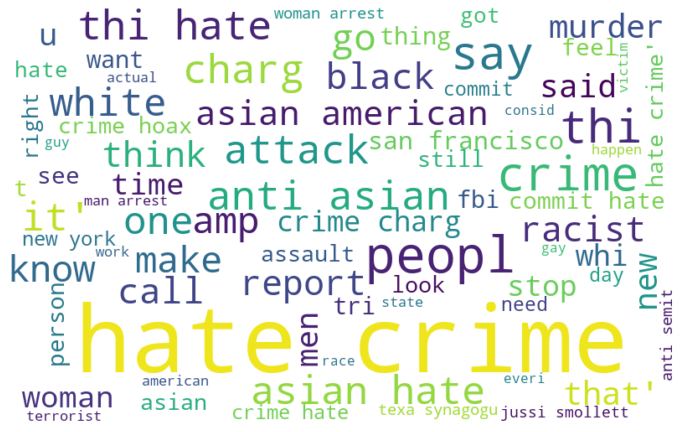

In [26]:
Ind_Cleanednormal_words = ' '.join([word for word in AS_Cleaned['clean_tweet']])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 75,background_color = "white").generate(normal_words)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

*India*

Normal words


(-0.5, 799.5, 499.5, -0.5)

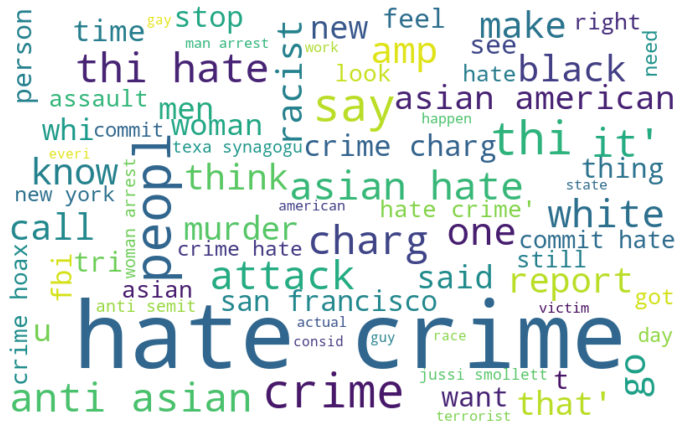

In [27]:
Ind_Cleanednormal_words = ' '.join([word for word in Ind_Cleaned['clean_tweet']])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 75,background_color = "white").generate(normal_words)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

# Vader Sentiment Analysis
- polarity
- subjectivity
- neg, neu, pos scores
- compound
-sentiment

*Europe*

In [28]:
#Europe
sia = SentimentIntensityAnalyzer()
EU_Cleaned[['polarity', 'subjectivity']] = EU_Cleaned['clean_tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, s in enumerate(EU_Cleaned['text']):
  ps = sia.polarity_scores(s)
  EU_Cleaned.loc[index,['neg']] = ps['neg']
  EU_Cleaned.loc[index,['neu']] = ps['neu']
  EU_Cleaned.loc[index,['pos']] = ps['pos']
  EU_Cleaned.loc[index,['compound']] = ps['compound']
  if ps['neg'] > ps['pos']:
    EU_Cleaned.loc[index,['sentiment']] = 'negative'
  elif ps['pos'] > ps['neg']:
    EU_Cleaned.loc[index,['sentiment']] = 'positive'
  else:
    EU_Cleaned.loc[index,['sentiment']] = 'neutral'
   
EU_Cleaned.head(10)

KeyError: "None of [Index(['neg'], dtype='object')] are in the [columns]"

In [ ]:
#EU Histograms of polarity and subjectivity
n_bins = 50
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(18,7))
ax1.hist(EU_Cleaned["polarity"], bins = n_bins)
ax1.set_title('EU Polarity Scores')
ax2.hist(EU_Cleaned["subjectivity"], bins = n_bins)
ax2.set_title('EU Subjectivity Scores')
plt.show()

In [ ]:
#EU Counterplot of sentiment
sns.set(rc={'figure.figsize':(10,7)})
ax = sns.countplot(x="sentiment", data=EU_Cleaned)
ax.set(xlabel='Europe Sentiment Result')

*North Amercia*

In [29]:
#North America
sia = SentimentIntensityAnalyzer()
NA_Cleaned[['polarity', 'subjectivity']] = NA_Cleaned['clean_tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, s in enumerate(NA_Cleaned['text']):
  ps = sia.polarity_scores(s)
  NA_Cleaned.loc[index,['neg']] = ps['neg']
  NA_Cleaned.loc[index,['neu']] = ps['neu']
  NA_Cleaned.loc[index,['pos']] = ps['pos']
  NA_Cleaned.loc[index,['compound']] = ps['compound']
  if ps['neg'] > ps['pos']:
    NA_Cleaned.loc[index,['sentiment']] = 'negative'
  elif ps['pos'] > ps['neg']:
    NA_Cleaned.loc[index,['sentiment']] = 'positive'
  else:
    NA_Cleaned.loc[index,['sentiment']] = 'neutral'
   
NA_Cleaned.head()

KeyError: "None of [Index(['neg'], dtype='object')] are in the [columns]"

In [ ]:
#NA Histograms of polarity and subjectivity
n_bins = 50
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(18,7))
ax1.hist(NA_Cleaned["polarity"], bins = n_bins)
ax1.set_title('NA Polarity Scores')
ax2.hist(NA_Cleaned["subjectivity"], bins = n_bins)
ax2.set_title('NA Subjectivity Scores')
plt.show()

In [ ]:
#NA Counterplot of sentiment
sns.set(rc={'figure.figsize':(10,7)})
ax = sns.countplot(x="sentiment", data=NA_Cleaned)
ax.set(xlabel='North America Sentiment Result')

*Asia*

In [30]:
#Asia
sia = SentimentIntensityAnalyzer()
AS_Cleaned[['polarity', 'subjectivity']] = AS_Cleaned['clean_tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, s in enumerate(AS_Cleaned['text']):
  ps = sia.polarity_scores(s)
  AS_Cleaned.loc[index,['neg']] = ps['neg']
  AS_Cleaned.loc[index,['neu']] = ps['neu']
  AS_Cleaned.loc[index,['pos']] = ps['pos']
  AS_Cleaned.loc[index,['compound']] = ps['compound']
  if ps['neg'] > ps['pos']:
    AS_Cleaned.loc[index,['sentiment']] = 'negative'
  elif ps['pos'] > ps['neg']:
    AS_Cleaned.loc[index,['sentiment']] = 'positive'
  else:
    AS_Cleaned.loc[index,['sentiment']] = 'neutral'
   
AS_Cleaned.head()

KeyError: "None of [Index(['neg'], dtype='object')] are in the [columns]"

In [ ]:
#AS Histograms of polarity and subjectivity
n_bins = 50
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(18,7))
ax1.hist(AS_Cleaned["polarity"], bins = n_bins)
ax1.set_title('AS Polarity Scores')
ax2.hist(AS_Cleaned["subjectivity"], bins = n_bins)
ax2.set_title('AS Subjectivity Scores')
plt.show()

In [ ]:
#AS Counterplot of sentiment
sns.set(rc={'figure.figsize':(10,7)})
ax = sns.countplot(x="sentiment", data=AS_Cleaned)
ax.set(xlabel='Asia Sentiment Result')

*India*

In [31]:
#Asia
sia = SentimentIntensityAnalyzer()
Ind_Cleaned[['polarity', 'subjectivity']] = Ind_Cleaned['clean_tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, s in enumerate(AS_Cleaned['text']):
  ps = sia.polarity_scores(s)
  Ind_Cleaned.loc[index,['neg']] = ps['neg']
  Ind_Cleaned.loc[index,['neu']] = ps['neu']
  Ind_Cleaned.loc[index,['pos']] = ps['pos']
  Ind_Cleaned.loc[index,['compound']] = ps['compound']
  if ps['neg'] > ps['pos']:
    Ind_Cleaned.loc[index,['sentiment']] = 'negative'
  elif ps['pos'] > ps['neg']:
    Ind_Cleaned.loc[index,['sentiment']] = 'positive'
  else:
    Ind_Cleaned.loc[index,['sentiment']] = 'neutral'
   
Ind_Cleaned.head()

KeyError: "None of [Index(['neg'], dtype='object')] are in the [columns]"

In [ ]:
#AS Histograms of polarity and subjectivity
n_bins = 50
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(18,7))
ax1.hist(Ind_Cleaned["polarity"], bins = n_bins)
ax1.set_title('AS Polarity Scores')
ax2.hist(Ind_Cleaned["subjectivity"], bins = n_bins)
ax2.set_title('AS Subjectivity Scores')
plt.show()

In [ ]:
#AS Counterplot of sentiment
sns.set(rc={'figure.figsize':(10,7)})
ax = sns.countplot(x="sentiment", data=Ind_Cleaned)
ax.set(xlabel='Asia Sentiment Result')

# Emo Analysis

### EU

In [32]:
EU_Cleaned.reset_index(inplace = True)

In [33]:
import text2emotion as t2e

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Merlin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Merlin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Merlin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [34]:
emoList = []

for i in range(EU_Cleaned.shape[0]):
    emoDict = t2e.get_emotion(EU_Cleaned['clean_tweet'][i])
    emoList.append(emoDict)

In [35]:
EU_Cleaned['emotion'] = emoList

In [36]:
EUdataFinalWithEmo = pd.concat([EU_Cleaned, pd.DataFrame(list(EU_Cleaned['emotion']))], axis=1)

In [37]:
EUdataEmo = EUdataFinalWithEmo

In [38]:
EUdataEmo = EUdataEmo.melt(id_vars = 
               EUdataFinalWithEmo.columns[0:8], 
               value_vars = EUdataFinalWithEmo.columns[9:15],
               var_name = 'emotion', 
               value_name = 'emotion_score').sort_values('index')

In [39]:
EUdataEmoPieChart = EUdataEmo.groupby('emotion')['emotion_score'].sum()

Text(0.5, 1.0, 'EU Attitudes Towards Racism and Hate Crime')

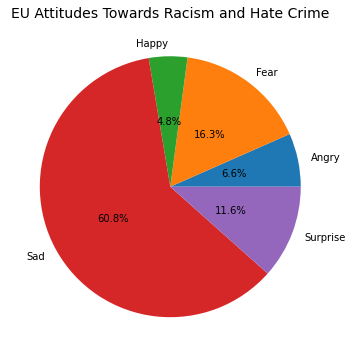

In [40]:
#Using matplotlib
pie, ax = plt.subplots(figsize=[10,6])
labels = EUdataEmoPieChart.keys()
plt.pie(x=EUdataEmoPieChart, autopct="%.1f%%",labels=labels, pctdistance=0.5)
plt.title("EU Attitudes Towards Racism and Hate Crime", fontsize=14)

### NA

In [41]:
NA_Cleaned.reset_index(inplace = True)

In [42]:
import text2emotion as t2e

In [43]:
emoList = []

for i in range(NA_Cleaned.shape[0]):
    emoDict = t2e.get_emotion(NA_Cleaned['clean_tweet'][i])
    emoList.append(emoDict)

In [44]:
NA_Cleaned['emotion'] = emoList

In [45]:
NAdataFinalWithEmo = pd.concat([NA_Cleaned, pd.DataFrame(list(NA_Cleaned['emotion']))], axis=1)

In [46]:
NAdataEmo = NAdataFinalWithEmo

In [47]:
NAdataEmo = NAdataEmo.melt(id_vars = 
               NAdataFinalWithEmo.columns[0:8], 
               value_vars = NAdataFinalWithEmo.columns[9:15],
               var_name = 'emotion', 
               value_name = 'emotion_score').sort_values('index')

In [48]:
NAdataFinalWithEmo

,index,text,retweet_count,favorite_count,clean_tweet,Hash words,polarity,subjectivity,emotion,Happy,Angry,Surprise,Sad,Fear
0,0,@TheRevAl @TheRevAl @MeetThePress @FaceTheNati...,1,1,"one ""white black americans"" v...",No hashtags,-0.083333,0.216667,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",0.00,0.0,0.0,0.0,1.00
1,1,@nathaliejacoby1 the legal punishment will not...,0,7,legal punish strong enough. i'm sure crimin ch...,No hashtags,0.283333,0.580556,"{'Happy': 0.33, 'Angry': 0.0, 'Surprise': 0.0,...",0.33,0.0,0.0,0.0,0.67
2,2,Cooper Kupp out there cookin Niggas like its ...,0,1,cooper kupp cookin nigga like hate crime !!!!,No hashtags,-1.000000,0.900000,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",0.00,0.0,0.0,1.0,0.00
3,3,@angry_gammy @thatdaneshguy Absolutely its a h...,0,0,absolut hate crime!!,No hashtags,-1.000000,0.900000,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",0.00,0.0,0.0,1.0,0.00
4,4,"@PR_NHL What about racism to white people, we ...",0,0,"what racism white people, label everi race att...",No hashtags,0.000000,0.000000,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",0.00,0.0,0.0,0.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,1197,@jesserker @_celia_bedelia_ It’s a hate crime,0,8,it' hate crime,No hashtags,-0.800000,0.900000,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",0.00,0.0,0.0,1.0,0.00
1198,1198,@7Enderlu @LeifQuitlong @lLOVELATlNAS YES IT I...,0,0,ye it is! it a hate crime!!!,No hashtags,-1.000000,0.900000,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",0.00,0.0,0.0,1.0,0.00
1199,1199,Jussie Smollet was found guilty of faking a ha...,820,3507,jussi smollet found guilti fake hate crime. wh...,No hashtags,-0.650000,0.950000,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.2, ...",0.00,0.0,0.2,0.8,0.00
1200,1200,hate crime https://t.co/5jKNewDyLn,0,0,hate crime,No hashtags,-0.800000,0.900000,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",0.00,0.0,0.0,1.0,0.00


In [49]:
NAdataEmoPieChart = NAdataEmo.groupby('emotion')['emotion_score'].sum()

Text(0.5, 1.0, 'NA Attitudes Towards Racism and Hate Crime')

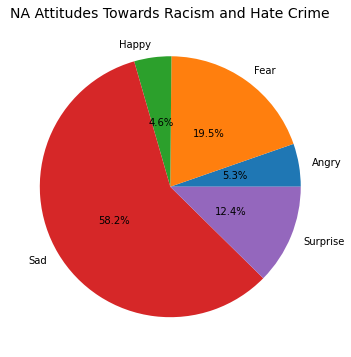

In [50]:
#Using matplotlib
pie, ax = plt.subplots(figsize=[10,6])
labels = NAdataEmoPieChart.keys()
plt.pie(x=NAdataEmoPieChart, autopct="%.1f%%",labels=labels, pctdistance=0.5)
plt.title("NA Attitudes Towards Racism and Hate Crime", fontsize=14)

### Asia

In [51]:
AS_Cleaned.reset_index(inplace = True)

In [52]:
import text2emotion as t2e

In [53]:
emoList = []

for i in range(AS_Cleaned.shape[0]):
    emoDict = t2e.get_emotion(AS_Cleaned['clean_tweet'][i])
    emoList.append(emoDict)

In [54]:
AS_Cleaned['emotion'] = emoList

In [55]:
ASdataFinalWithEmo = pd.concat([AS_Cleaned, pd.DataFrame(list(AS_Cleaned['emotion']))], axis=1)

In [56]:
ASdataEmo = ASdataFinalWithEmo

In [57]:
ASdataEmo = ASdataEmo.melt(id_vars = 
               ASdataFinalWithEmo.columns[0:8], 
               value_vars = ASdataFinalWithEmo.columns[9:15],
               var_name = 'emotion', 
               value_name = 'emotion_score').sort_values('index')

In [58]:
ASdataFinalWithEmo

,index,text,retweet_count,favorite_count,clean_tweet,Hash words,polarity,subjectivity,emotion,Happy,Angry,Surprise,Sad,Fear
0,0,District attorney of Connecticut: James be cha...,0,0,district attorney connecticut: jame charg hate...,No hashtags,-1.0,0.90,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",0.0,0.0,0.00,0.67,0.33
1,1,@hongerootooties this is a hate crime cc: @ril...,0,0,hate crime cc:,No hashtags,-0.8,0.90,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",0.0,0.0,0.00,1.00,0.00
2,2,@k_athanasi @FrankPallone Your tweet is a HATE...,0,0,your tweet hate crime!..,No hashtags,-1.0,0.90,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",0.0,0.0,0.00,1.00,0.00
3,3,This is a hate crime https://t.co/Zzfvrvjmft,0,1,thi hate crime,No hashtags,-0.8,0.90,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",0.0,0.0,0.00,1.00,0.00
4,4,@legendaryadkins this is hate crime,0,0,hate crime,No hashtags,-0.8,0.90,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",0.0,0.0,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,213,@MayorDanGelber @MiamiBeachPD @MayorDanGelber ...,0,0,", none recipi see anything? a vehicle? hear vo...",No hashtags,0.0,0.00,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",0.0,0.0,0.00,0.00,1.00
214,214,@phoshnk @starpIasma a self hate crime\nwe sou...,0,0,self hate crime south asian gotta stick togeth,No hashtags,-0.4,0.45,"{'Happy': 0.2, 'Angry': 0.0, 'Surprise': 0.0, ...",0.2,0.0,0.00,0.40,0.40
215,215,@anguscloud WHERE’S MY FEXI MOMETS IM GONNA CO...,1,35,where' my fexi momet im gonna comit a hate crime,No hashtags,-0.8,0.90,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",0.0,0.0,0.00,1.00,0.00
216,216,@NarliestNarwhal @Gabriel65240872 gonna hate c...,0,2,gonna hate crime gabe costco park lot,No hashtags,-0.8,0.90,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",0.0,0.0,0.00,0.75,0.25


In [59]:
ASdataEmo

,index,text,retweet_count,favorite_count,clean_tweet,Hash words,polarity,subjectivity,emotion,emotion_score
0,0,District attorney of Connecticut: James be cha...,0,0,district attorney connecticut: jame charg hate...,No hashtags,-1.0,0.9,Happy,0.00
654,0,District attorney of Connecticut: James be cha...,0,0,district attorney connecticut: jame charg hate...,No hashtags,-1.0,0.9,Sad,0.67
436,0,District attorney of Connecticut: James be cha...,0,0,district attorney connecticut: jame charg hate...,No hashtags,-1.0,0.9,Surprise,0.00
218,0,District attorney of Connecticut: James be cha...,0,0,district attorney connecticut: jame charg hate...,No hashtags,-1.0,0.9,Angry,0.00
872,0,District attorney of Connecticut: James be cha...,0,0,district attorney connecticut: jame charg hate...,No hashtags,-1.0,0.9,Fear,0.33
...,...,...,...,...,...,...,...,...,...,...
871,217,@KatiePhang Actually this qualifies as a “hate...,28,476,"actual qualifi ""hate crime"" connecticut crimin...",No hashtags,-0.4,0.5,Sad,0.67
435,217,@KatiePhang Actually this qualifies as a “hate...,28,476,"actual qualifi ""hate crime"" connecticut crimin...",No hashtags,-0.4,0.5,Angry,0.00
217,217,@KatiePhang Actually this qualifies as a “hate...,28,476,"actual qualifi ""hate crime"" connecticut crimin...",No hashtags,-0.4,0.5,Happy,0.00
653,217,@KatiePhang Actually this qualifies as a “hate...,28,476,"actual qualifi ""hate crime"" connecticut crimin...",No hashtags,-0.4,0.5,Surprise,0.33


In [60]:
ASdataEmoPieChart = ASdataEmo.groupby('emotion')['emotion_score'].sum()

Text(0.5, 1.0, 'Asian Attitudes Towards Racism and Hate Crime')

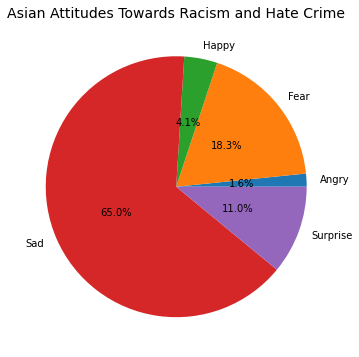

In [61]:
#Using matplotlib
pie, ax = plt.subplots(figsize=[10,6])
labels = ASdataEmoPieChart.keys()
plt.pie(x=ASdataEmoPieChart, autopct="%.1f%%",labels=labels, pctdistance=0.5)
plt.title("Asian Attitudes Towards Racism and Hate Crime", fontsize=14)

### India

In [62]:
Ind_Cleaned.reset_index(inplace = True)

In [63]:
import text2emotion as t2e

In [64]:
emoList = []

for i in range(Ind_Cleaned.shape[0]):
    emoDict = t2e.get_emotion(Ind_Cleaned['clean_tweet'][i])
    emoList.append(emoDict)

In [65]:
Ind_Cleaned['emotion'] = emoList

In [66]:
InddataFinalWithEmo = pd.concat([Ind_Cleaned, pd.DataFrame(list(Ind_Cleaned['emotion']))], axis=1)

In [67]:
InddataEmo = InddataFinalWithEmo

In [68]:
InddataEmo = InddataEmo.melt(id_vars = 
               InddataFinalWithEmo.columns[0:8], 
               value_vars = InddataFinalWithEmo.columns[9:15],
               var_name = 'emotion', 
               value_name = 'emotion_score').sort_values('index')

In [69]:
InddataEmoPieChart = InddataEmo.groupby('emotion')['emotion_score'].sum()

Text(0.5, 1.0, 'Asian Attitudes Towards Racism and Hate Crime')

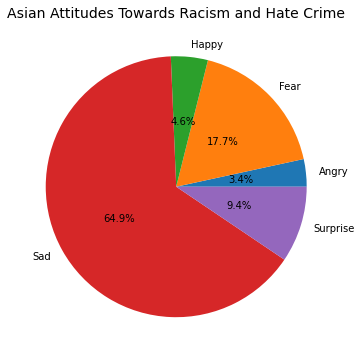

In [71]:
#Using matplotlib
pie, ax = plt.subplots(figsize=[10,6])
labels = InddataEmoPieChart.keys()
plt.pie(x=InddataEmoPieChart, autopct="%.1f%%",labels=labels, pctdistance=0.5)
plt.title("Asian Attitudes Towards Racism and Hate Crime", fontsize=14)